(-0.5, 339.5, 269.5, -0.5)

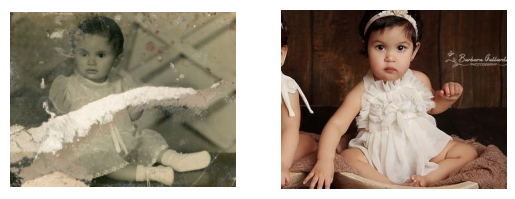

In [1]:
from PIL import Image
import torch
from similarity_net import SimilarityNet
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


# Initialize the model
att_model = SimilarityNet()

img = Image.open('../data/img/1.png')
ref = Image.open('../data/ref/1.jpg')

In [2]:
transf = transforms.Compose([transforms.Resize((256,256)), transforms.ToTensor()])

tensor_img = transf(img).unsqueeze(0)
tensor_ref = transf(ref).unsqueeze(0)
inputte = torch.cat((tensor_img, tensor_ref))

out = att_model(inputte)

Resnet out img:  [torch.Size([1, 64, 64, 64]), torch.Size([1, 128, 32, 32]), torch.Size([1, 256, 16, 16]), torch.Size([1, 512, 8, 8])]
Resnet out ref:  [torch.Size([1, 64, 64, 64]), torch.Size([1, 128, 32, 32]), torch.Size([1, 256, 16, 16]), torch.Size([1, 512, 8, 8])]

Conv out img:  [torch.Size([1, 64, 64, 64]), torch.Size([1, 64, 32, 32]), torch.Size([1, 64, 16, 16]), torch.Size([1, 64, 8, 8])]
Conv out ref:  [torch.Size([1, 64, 64, 64]), torch.Size([1, 64, 32, 32]), torch.Size([1, 64, 16, 16]), torch.Size([1, 64, 8, 8])]

M img:  [torch.Size([1, 256, 64, 64]), torch.Size([1, 256, 32, 32]), torch.Size([1, 256, 16, 16]), torch.Size([1, 256, 8, 8])]
M res:  [torch.Size([1, 256, 64, 64]), torch.Size([1, 256, 32, 32]), torch.Size([1, 256, 16, 16]), torch.Size([1, 256, 8, 8])]

M reshaped img:  [torch.Size([1, 256, 4096]), torch.Size([1, 256, 1024]), torch.Size([1, 256, 256]), torch.Size([1, 256, 64])]
M reshaped ref:  [torch.Size([1, 256, 4096]), torch.Size([1, 256, 1024]), torch.Size([

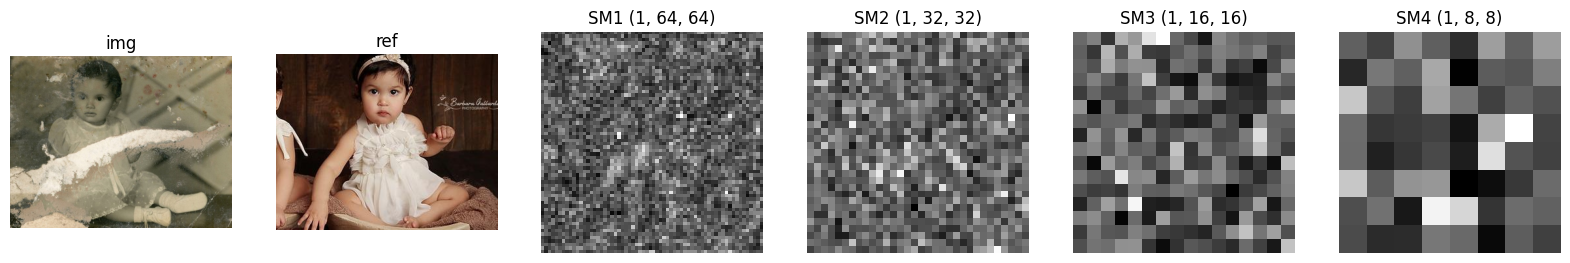

In [25]:
plt.subplots(1,6, figsize=(20,10))

plt.subplot(1,6,1)
plt.title("img")
plt.imshow(img)
plt.axis('off')

plt.subplot(1,6,2)
plt.title('ref')
plt.imshow(ref)
plt.axis('off')

for i in range(4):
    plt.subplot(1,6,i+3)
    plt.title(f"SM{i+1} {tuple(out[i][0].shape[-3:])}")
    plt.imshow(out[i][0].detach().numpy().transpose(2,1,0), cmap='gray')
    plt.axis('off')

In [4]:
import torch
import torch.nn as nn
tensor = torch.rand(3,3,4,5)
print(tensor.shape)
print(nn.ReflectionPad2d(1)(tensor).shape)
print(tensor[0].view(-1, tensor.shape[-3]).shape)

torch.Size([3, 3, 4, 5])
torch.Size([3, 3, 6, 7])
torch.Size([20, 3])
